##### FGV EPGE - Escola de Pós-graduação em Economia

##### Disciplina: Computação
---

# **Trabalho A2** 
###**Alunos: Leonardo Lourenço e Maria Luiza Miorin**  
####Fonte dos dados: http://painel.saude.rj.gov.br/monitoramento/covid19.html#

#Base de Dados

###A base de dados foi obtida atráves do 'Painel Saúde RJ', site do governo do Rio de Janeiro, que oferece gráficos e tabelas sobre a situação da contaminação e dos óbitos no Estado pelo novo coronavírus.
### Os dados são disponibilizados de maneira á descrever cada pessoa contaminada, entretanto o objetivo aqui, é utilizar os dados quantitativos quanto aos totais de contaminações e óbitos sendo assim se torna necessário criar novos Data Frames.


In [ ]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import random as rd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
!pip install geobr
!pip install geopandas
import geobr
import os
from google.colab import drive
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



     |████████████████████████████████| 972kB 9.4MB/s 
     |████████████████████████████████| 1.8MB 20.6MB/s 
     |████████████████████████████████| 6.5MB 31.6MB/s 
     |████████████████████████████████| 14.8MB 280kB/s 
  Created wheel for geobr: filename=geobr-0.1.7-cp36-none-any.whl size=29675 sha256=90ebada2be9d5b2f0617ccd62997f2be5427e76f9f9d10e9f273c1399e864276
  Stored in directory: /root/.cache/pip/wheels/3a/ee/b8/3623662598df008bb5a298de86f40e81e64ed9848045df54b4
Successfully built geobr
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1


In [ ]:
#Inserindo o comando de leitura do arquivo .xlsx
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Python'
#Criando o diretório
os.chdir(root_path)

Mounted at /content/gdrive


##Base de dados original


In [ ]:
#Escolhendo a pasta de trablho do Excel que será utilizada
excel = pd.ExcelFile(os.listdir()[2])
#Escolhendo a planilha e nomeando-a
dadoscovid = pd.read_excel(os.listdir()[2], sheet_name = 'COVID (1)')
dadoscovid

,SEXO,IDADE,MUNICIPIO,DATA SINTOMA,DATA NOTIFICAÇÃO,EVOLUÇÃO,DATA OBITO,DIAS
0,M,42.0,SAO GONCALO ...,2020/04/15 00:00:00.000,2020/04/17 00:00:00.000,NaN,NaN,198.0
1,F,46.0,NOVA IGUACU ...,2020/05/05 00:00:00.000,2020/05/05 00:00:00.000,NaN,NaN,178.0
2,M,23.0,MACAE ...,2020/05/03 00:00:00.000,2020/05/06 00:00:00.000,NaN,NaN,180.0
3,M,23.0,MACAE ...,2020/05/01 00:00:00.000,2020/05/03 00:00:00.000,NaN,NaN,182.0
4,M,55.0,ANGRA DOS REIS ...,2020/05/23 00:00:00.000,2020/05/23 00:00:00.000,NaN,NaN,160.0
...,...,...,...,...,...,...,...,...
308012,F,82.0,RIO DE JANEIRO ...,2020/09/02 00:00:00.000,2020/09/11 00:00:00.000,OBITO,2020/09/14 00:00:00.000,58.0
308013,F,92.0,RIO DE JANEIRO ...,2020/05/29 00:00:00.000,2020/06/15 00:00:00.000,OBITO,2020/06/13 00:00:00.000,154.0
308014,F,88.0,RIO DE JANEIRO ...,2020/03/22 00:00:00.000,2020/03/23 00:00:00.000,OBITO,2020/03/26 00:00:00.000,222.0
308015,F,93.0,RIO DE JANEIRO ...,2020/05/18 00:00:00.000,2020/05/24 00:00:00.000,OBITO,2020/05/26 00:00:00.000,165.0


### Uma breve introdução

O primeiro caso de contaminação pelo corona vírus dentro do Estado do Rio de Janeiro foi registrado no dia 5 de março, em uma mulher adulta no município de Barra Mansa. O segundo caso foi registrado 2 dias depois, também em uma mulher, porém, dessa vez na Capital Rio de Janeiro. Podemos reparar, que os primeiros casos do vírus não são correlacionados , tendo em vista que essas pessoas se contaminaram fora do estado do Rio de Janeiro e provavelmente não mantinham contato. Portanto, a ideia aqui não é de manter uma relação entre os contaminados e sim buscar visualizar de maneira geral os dados a respeito do impacto do vírus nos municípios do Rio de Janeiro.


Levando em consideração, que nós queremos saber o dia exato que as pessoas foram contaminadas, então, ao invés de utilizarmos a data que a contaminação foi registrada nós iremos utilizar a data na qual a pessoa apresentou os sintomas do vírus.  Portanto, como vai ser visto no texto a seguir a respeito do dia zero, temos que o primeiro sintoma foi no dia 1 de janeiro , ou seja, não iremos fazer o uso da data de registro, que contabilizou apenas o primeiro caso do vírus no dia 5 de março, pra contabilizar as contaminações.




##**OBSERVAÇÃO DIA ZERO**

In [ ]:
indice=dadoscovid['DIAS'].idxmax()
primeira_aparicao_sintoma = str(dadoscovid['DATA SINTOMA'][indice]).replace(' ','')
primeira_aparicao_sintoma = primeira_aparicao_sintoma[8:10]+'/'+primeira_aparicao_sintoma[5:7]+'/'+primeira_aparicao_sintoma[0:4]
indice=dadoscovid['DIAS'].idxmax()
notif_pat= str(dadoscovid['DATA NOTIFICAÇÃO'][indice]).replace(' ','')
notif_pat=notif_pat[8:10]+'/'+notif_pat[5:7]+'/'+notif_pat[0:4]
print('O primeiro paciente com contaminação confirmada apresentou sintomas em',primeira_aparicao_sintoma,'porém só houve notificação em',notif_pat,'''.
Como o objetivo é montar análises baseadas na aparição dos sintomas, ou seja, na percepção da contaminação, consideraremos o "DIA ZERO"
como 1 de janeiro de 2020.''')

O primeiro paciente com contaminação confirmada apresentou sintomas em 01/01/2020 porém só houve notificação em 18/09/2020 .
Como o objetivo é montar análises baseadas na aparição dos sintomas, ou seja, na percepção da contaminação, consideraremos o "DIA ZERO"
como 1 de janeiro de 2020.


## Novo Data Frame do total de contaminações, em cada munícipio até o dia 29/10

In [ ]:
dados=pd.DataFrame()
dados['TOTAL']=dadoscovid['MUNICIPIO'].value_counts()
dados['MULHERES']=pd.DataFrame(dadoscovid[dadoscovid['SEXO'].isin(['F'])]['MUNICIPIO'].value_counts())
dados['HOMENS']=pd.DataFrame(dadoscovid[dadoscovid['SEXO'].isin(['M'])]['MUNICIPIO'].value_counts())
dados['IDOSOS']=dadoscovid[dadoscovid['IDADE']>59]['MUNICIPIO'].value_counts()
dados['CRIANÇAS/ADOLESCENTES']=dadoscovid[dadoscovid['IDADE']<19]['MUNICIPIO'].value_counts()
dados=dados.fillna(0)
dados

,TOTAL,MULHERES,HOMENS,IDOSOS,CRIANÇAS/ADOLESCENTES
RIO DE JANEIRO,118433,62705,55724,15912.0,389.0
NITEROI,15566,8361,7205,0.0,0.0
SAO GONCALO,14814,7819,6995,2827.0,899.0
BELFORD ROXO,11147,6610,4537,2140.0,1143.0
DUQUE DE CAXIAS,10874,5598,5276,2363.0,494.0
...,...,...,...,...,...
MACUCO,121,57,64,20.0,12.0
SAO SEBASTIAO DO ALTO,88,44,44,21.0,8.0
DUAS BARRAS,78,36,42,14.0,5.0
TRAJANO DE MORAES,68,33,35,11.0,9.0



```
```


## Novo Data Frame acerca dos óbitos até o dia 29/10


In [ ]:
obitos = dadoscovid[dadoscovid['EVOLUÇÃO'].isin(['OBITO          '])].copy()
dadosobitos=pd.DataFrame()
dadosobitos['TOTAL']=obitos['MUNICIPIO'].value_counts()
dadosobitos['MULHERES']=pd.DataFrame(obitos[obitos['SEXO'].isin(['F'])]['MUNICIPIO'].value_counts())
dadosobitos['HOMENS']=pd.DataFrame(obitos[obitos['SEXO'].isin(['M'])]['MUNICIPIO'].value_counts())
dadosobitos['IDOSOS']=obitos[obitos['IDADE']>59]['MUNICIPIO'].value_counts()
dadosobitos['CRIANÇAS/ADOLESCENTES']=obitos[obitos['IDADE']<19]['MUNICIPIO'].value_counts()
dadosobitos.loc['TRAJANO DE MORAES                                 ',:]=dados.loc['TRAJANO DE MORAES                                 ',:]
dadosobitos.loc['TRAJANO DE MORAES                                 ',:]=[0,0,0,0,0]
dadosobitos=dadosobitos.fillna(0)
dadosobitos

,TOTAL,MULHERES,HOMENS,IDOSOS,CRIANÇAS/ADOLESCENTES
RIO DE JANEIRO,12064.0,5387.0,6677.0,9298.0,33.0
SAO GONCALO,783.0,331.0,452.0,574.0,4.0
DUQUE DE CAXIAS,783.0,370.0,413.0,536.0,7.0
NOVA IGUACU,664.0,315.0,348.0,439.0,4.0
NITEROI,500.0,231.0,269.0,0.0,0.0
...,...,...,...,...,...
CANTAGALO,2.0,0.0,2.0,1.0,0.0
LAJE DO MURIAE,2.0,1.0,1.0,2.0,0.0
QUATIS,2.0,2.0,0.0,2.0,0.0
CORDEIRO,1.0,1.0,0.0,0.0,0.0


### Objetivo dos Data Frames

Primeiramente, é de interesse nosso analisar a população afetada pela pandemia do COVID-19. Portanto, além de separarmos unicamente pelos municípios também iremos separar as amostras em gênero e idade para que assim possamos ter ideia de que grupo dentro do rio de janeiro está sendo mais afetado e de quem está sendo mais afetado. Para isso, criamos dois data frames, um demonstrando a quantidade de contaminações separadas tanto pela localização do caso quanto pelas informações gerais da amostra afetada, o outro demonstra a quantidade de óbitos e é separado da mesma maneira.

# 1.Gráficos estaduais

##1.1 - Gráficos acerca da evolução dos níveis de contaminação no Rio de Janeiro

Os gráficos a seguir apresentam o crescimento de casos no Rio de Janeiro. O primeiro, é um gráfico interativo que demonstra os dias e as quantidades de casos que ocorreram nesse determinado dia, além disso, o gráfico traça uma “linha de tendência” que é, basicamente, uma m conceito de séries temporais utilizado para mostrar como se comporta determinado fenômeno, nesse caso o fenômeno seria o crescimento das contaminações. 


O segundo gráfico, ao invés de demonstrar como o crescimento dos casos ocorreu diariamente, ele demonstra uma curva por mês a respeito do crescimento das contaminações naquele mês, além disso, visando comparar os meses anteriores e buscando também visualizar qual seria o mês com maior crescimento e o mês com menor crescimento temos que cada gráfico mensal possui as curvas de todos os meses, mas dando atenção para a curva daquele mês.


#### Gráfico do total de casos diários confirmados no Estado

In [ ]:
contaminacoes_diarias=dadoscovid['DIAS'].value_counts()
contaminacoes_diarias=contaminacoes_diarias.reset_index()
contaminacoes_diarias=contaminacoes_diarias.sort_values(by=['index'])
contaminacoes_diarias['TOTALDIAS']=[281-x for x in contaminacoes_diarias['index']]
contaminacoes_diarias.columns=['index','Contaminações Diárias','Dias']
fig = px.scatter(contaminacoes_diarias, x='Dias', y='Contaminações Diárias', opacity=0.65,trendline='ols', trendline_color_override='blue')
fig.show()

Analisando o gráfico acima, percebemos duas coisas. A primeira é que a maior incidência de casos, ou seja, o ápice das contaminações no Rio de Janeiro ocorreu por volta do dia 100, apresentando um nível de contaminação diária de mais de 3500. Por último, a partir do dia 77 até por volta do dia 190 o nosso gráfico apresentou dias em que a contaminação diária se manteve acima da “linha de tendência” demonstrando que esses dias apresentaram um nível de contaminação maior que a média.

#### Gráfico do nível de contaminações diárias durante um deteminado mês

In [ ]:
dadoscovid['MES']=[str(x)[5:7] for x in dadoscovid['DATA SINTOMA']]
dadoscovid['DIA']=[str(x)[8:10] for x in dadoscovid['DATA SINTOMA']]
total_diario=dadoscovid[dadoscovid['MES'].isin(['0'+str(x) for x in range(1,10)]+['10'])][['MES','DIA']]
meses=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro']
total_diario['MES_TXT']=[meses[int(x)-1] for x in total_diario['MES']]
total_diario=total_diario.groupby(by=['MES_TXT','DIA']).count()
total_diario.reset_index(inplace = True)
total_diario.columns=['Meses','Dias',"Número de contaminações"]
total_diario['NUM_MES']=[meses.index(x)+1 for x in total_diario['Meses']]
total_diario=total_diario.sort_values(['NUM_MES','Dias'])

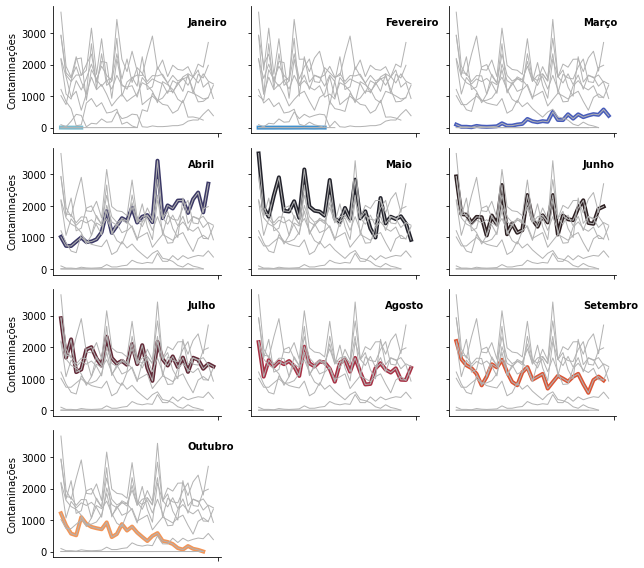

In [ ]:
g = sns.relplot(data=total_diario,x="Dias", y="Número de contaminações", col="Meses", hue="Meses",kind="line", palette="icefire", linewidth=4,col_wrap=3, height=2, aspect=1.5,legend=False)
for Meses, ax in g.axes_dict.items():
    ax.text(.8, .85, Meses, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(data=total_diario, x="Dias", y="Número de contaminações", units="Meses",estimator=None, color=".7", linewidth=1, ax=ax,)
ax.set_xticks('')
g.set_titles("")
g.set_axis_labels("", "Contaminações")
g.tight_layout()

Analisando os gráficos mensais podemos repara que os maiores níveis de contaminação ocorreram nos meses de Abril, Maio e Junho. Esses meses se situam no entre o dia 91 e 181 do ano, que como visto no gráfico anterior foram dias que o nível de contaminação diário se manteve acima da linha de tendência. 


Os meses com menores níveis foram os meses de Janeiro, Fevereiro e Março, que se situam no inicio do ano e coincidentemente no inicio da pandemia no Estado do Rio de Janeiro. Portanto, até agora temos que os menores níveis de contaminações ocorreram no início do ano, o que é justo tendo em vista que foi no inicio da pandemia, porém, também é preocupante pois até agora não vimos um mês em que o nível tenha sido mais baixo que esses meses indicando o final da pandemia no Estado.


O único mês que indica uma recuperação do Rio de Janeiro é o mês de Outubro, que apesar de não ter um volume menor que os meses onde a pandemia foi iniciada, teve uma clara tendência de queda no crescimento dos níveis de contaminação, coisa não vista antes. É claro que , por exemplo, nos meses de Julho, Agosto e Setembro , ou seja, logo após as máximas históricas da pandemia no Estado, nós tivemos uma queda na contaminação diária, porém, essa queda ela não se manteve, ao invés disso, ocorreu uma queda e logo em sequência os níveis se mantiveram, ou seja, nem aumentaram nem diminuíram. Portanto, o único mês que demonstra uma certa esperança de recuperação da pandemia é o mês de outubro, basta ,deste modo, observar os meses após o mês de outubro e buscar perceber se essa tendência de outubro continuará.


Como não possuímos os dados depois do dia 29 de outubro não podemos então analisar se a tendência dita anteriormente ocorrerá, mas podemos afirmar que o mês de outubro demonstra uma forte tendência de redução nos níveis de contaminação diários.

Ademais, buscando enriquecer o trabalho e dar um contexto para os meses observados, podemos analisar como que foi a tomada de decisões nas políticas ao combate a pandemia no Estado do Rio de Janeiro. Primeiramente, sabemos que a principal política adotas pelo estado foi a quarentena, que é basicamente uma política que diminui a circulação de pessoas na cidade buscando diminuir o contato entre as pessoas e dessa forma reduzir os níveis de contaminação.   

A quarentena começou no mês de março, ou seja, em um mês em que os níveis ainda eram baixos mas que apresentavam uma clara tendência de alta, o governo visando ,portanto, tomar uma atitude preventiva para o que foi observado em outros países que demoraram para entrar em quarentena acontecesse no Rio de janeiro adotou essa política mais cedo, em um mês em que a contaminação não demonstrava ser muito alta.

O que foi observado nos meses anteriores a quarentena foi , como já dito, um grande aumento na contaminação. Portanto, podemos afirmar que a decisão do governo foi correta em prever esse acontecimento e a partir da politica de isolamento social buscar controlar esse aumento , que era de certa maneira inevitável, para que a situação não se tornasse tão grave como o que foi observado em outros locais, que não estão dentro da nossa amostra observada.



##1.2 - Gráfico da evolução do total diário de óbitos confirmados no Estado.
####Este gráfico tem como primeira observação, a primeira morte notificada no Rio de Janeiro, ocorrida em 17 de março.

In [ ]:
obitos['MES']=[str(x)[5:7] for x in obitos['DATA OBITO']]
obitos['DIA']=[str(x)[8:10] for x in obitos['DATA OBITO']]
total_diario=obitos[obitos['MES'].isin(['0'+str(x) for x in range(1,10)]+['10'])][['MES','DIA']]
meses=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro']
total_diario['MES_TXT']=[meses[int(x)-1] for x in total_diario['MES']]
total_diario=total_diario.groupby(by=['MES_TXT','DIA']).count()
total_diario.reset_index(inplace=True)
total_diario.columns=['Meses','Dias',"Número de obitos"]
total_diario['NUM_MES']=[meses.index(x)+1 for x in total_diario['Meses']]
total_diario=total_diario.sort_values(['NUM_MES','Dias'])
fig = go.Figure(data=go.Scatter(y =total_diario['Número de obitos'],mode='markers',marker=dict(size=16,color=np.random.randn(500), colorscale="greys",showscale=True)))
fig.update_layout(title='Evolução das mortes desde o dia 17/03/2020 (76º dia do ano)')
fig.show()

É possível observar, que o período de maior número de mortes se inicia no 123º dia do ano, 23 dias após o período de maior contaminação.

##1.3 - Dados estaduais separados por gênero e faixa etária

Depois de termos feito a análise de como ocorreu os níveis de contaminação  e de óbitos no Estado do Rio de Janeiro, podemos agora visualizar como que foi a incidência desse nível nos diferentes grupos da população afetada. Primeiro iremos observar como esses níveis afetaram os diferentes grupos de gênero, buscando visualizar qual é o gênero que mais foi contaminado e que sofreu mais óbitos para então analisar se existe alguma correlação entre o a contaminação e/ou óbitos de gênero. Da mesma forma que faremos para os grupos de gênero também faremos para os diferentes grupos de faixa etária, com o mesmo objetivo em mente, buscar uma correlação ou uma visualização melhor de quem mais foi afetado pelo vírus.

## Gráficos acerca dos niveís de contaminação e óbitos por gênero

###Contaminações por gênero

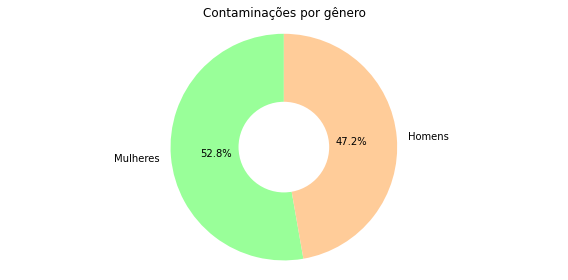

In [ ]:
#Criando variáveis
tot =dados['TOTAL'].sum()
mul =dados['MULHERES'].sum()
hom =dados['HOMENS'].sum()
#Montando gráfico
legenda = ['Mulheres','Homens']
fatias = [mul/tot,hom/tot]
#Escolhendo as cores
colors = ['#99ff99','#ffcc99']
#Escolhendo o tamanho do gráfico
fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.pie(fatias, colors = colors, labels=legenda,
        #Inserindo a porcentagem de cada variável
        autopct='%1.1f%%', 
        #Escolhendo o ângulo
        startangle=90)
#Criando círculo central
centre_circle = plt.Circle((0,0),
                           #Escolhendo tamanho e cor do círculo central
                           0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title('Contaminações por gênero')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

###Óbitos por gênero

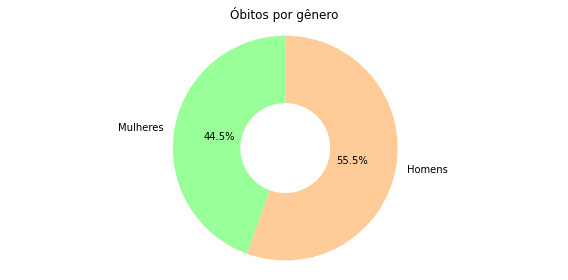

In [ ]:
#Criando variáveis
tot = sum(list(dadosobitos['TOTAL']))
mul = sum(list(dadosobitos['MULHERES']))
hom = sum(list(dadosobitos['HOMENS']))
#Montando gráfico
legenda = ['Mulheres','Homens']
fatias = [mul/tot,hom/tot]
#Escolhendo as cores
colors = ['#99ff99','#ffcc99']
#Escolhendo o tamanho do gráfico
fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.pie(fatias, colors = colors, labels=legenda,
        #Inserindo a porcentagem de cada variável
        autopct='%1.1f%%', 
        #Escolhendo o ângulo
        startangle=90)
#Criando círculo central
centre_circle = plt.Circle((0,0),
                           #Escolhendo tamanho e cor do círculo central
                           0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title('Óbitos por gênero')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Conclusão a respeito dos niveís de contaminação e óbitos por gênero

A única coisa que podemos afirmar sobre esses dois gráficos é de que a incidência de contaminações é maior no gênero feminino . Porém, apesar dessa grande incidência de contaminações é o outro grupo que mais possui óbitos. Portanto, apesar da contaminação ocorrer mais em mulheres, quem mais sofre com óbitos é o gênero masculino com um percentual de 55.5%.

###Contaminações por faixa etária

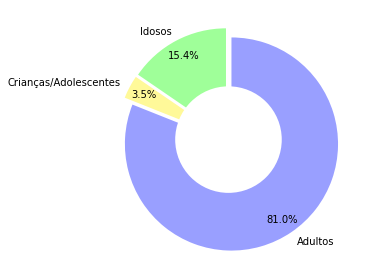

In [ ]:
dadosidades=dados[['TOTAL','IDOSOS','CRIANÇAS/ADOLESCENTES']]
dadosidades = dadosidades.dropna()
tot = dadosidades['TOTAL'].sum()
ma60 = dadosidades['IDOSOS'].sum()
me18 = dadosidades['CRIANÇAS/ADOLESCENTES'].sum()
adult = tot - (ma60+me18)
legenda = ['Idosos','Crianças/Adolescentes','Adultos']
fatias = [ma60/tot,me18/tot,adult/tot]
colors = ['#9fff99','#fff999','#999fff']
explode = (0.05,0.05,0.05)
plt.pie(fatias, colors = colors, labels=legenda, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
plt.tight_layout()
plt.show()

###Óbitos por faixa etária




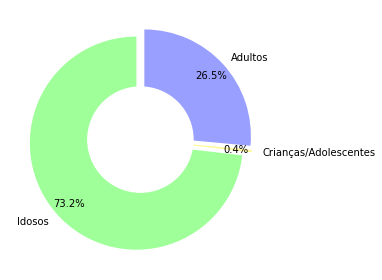

In [ ]:
dadosidades=dadosobitos[['IDOSOS','CRIANÇAS/ADOLESCENTES','TOTAL']]
dadosidades = dadosidades.dropna()
tot = sum(dadosidades['TOTAL'])
ma60 = sum(dadosidades['IDOSOS'])
me18 = sum(dadosidades['CRIANÇAS/ADOLESCENTES'])
adult = tot - (ma60+me18)
legenda = ['Idosos','Crianças/Adolescentes','Adultos']
fatias = [ma60/tot,me18/tot,adult/tot]
colors = ['#9fff99','#fff999','#999fff']
explode = (0.05,0.05,0.05)
plt.pie(fatias, colors = colors, labels=legenda, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
plt.tight_layout()
plt.show()

### Conclusão a respeito dos niveís de contaminação e óbitos por faixa etária

Aqui conseguimos ver uma clara tendência. Diferentemente do impacto em gêneros, onde não existe um impacto surpreendentemente em um dos grupos, aqui temos um grupo que possui uma grande disparidade em relação aos outros. Nos dois gráficos vistos possuímos 3 grupos, o grupo de crianças e adolescentes, o dos adultos e o dos idosos, no primeiro gráfico podemos reparar que o grupo que mais sofre com contaminações é o grupo de adultos, com uma grande disparidade comparado aos outros, com 81 porcento dos casos. Porém, como podemos observar no segundo gráfico é a população idosa que mais sofre com os óbitos e as crianças e adolescentes são o que menos sofrem tanto em níveis de contaminação quanto de óbitos.

#2.Gráficos municipais

##10 munícipios com maior contaminação

Depois de termos observado as séries temporais e o impacto do vírus nos diferentes grupos de gêneros e de faixa etária, podemos agora partir para analisar os municípios.

 Primeiramente começaremos a observar quais foram os municípios mais afetados, primeiro em valores absolutos, ou seja, pela contaminação total que ocorreu e logo depois veremos a contaminação em relação a população total que vive naquele município. 
 
O primeiro gráfico, que demonstra os valores absolutos pode nos ajudar a reconhecer quais os municípios que possuem mais peso nas contaminações totais do Estado do Rio de Janeiro. Já o segundo gráfico pode nos ajudar a reconhecer quais são os municípios que mais sofreram em termos reais, ou seja, qual foi o município que teve a maior porcentagem da sua população total afetada.


###Gráfico em termos absolutos

Text(0.5, 1.0, '10 munícipios com maior contaminação em termos absolutos')

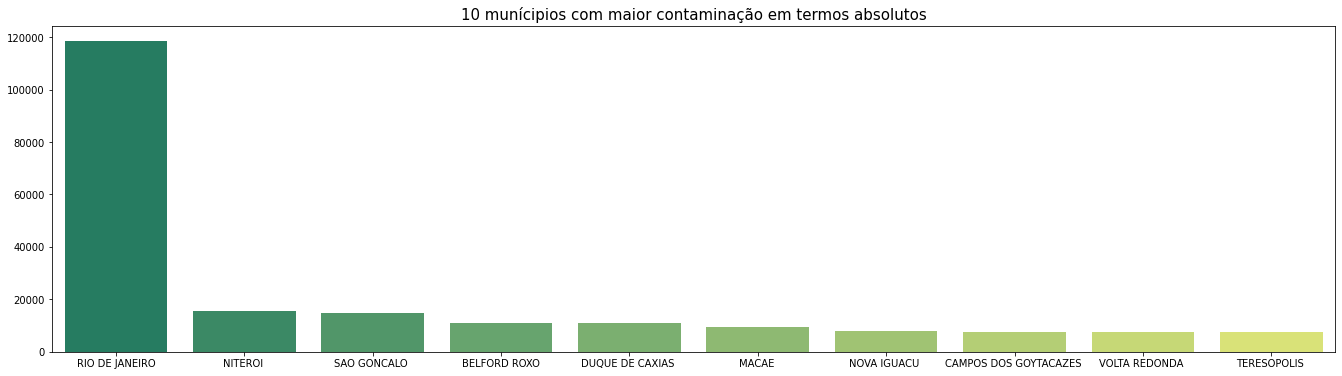

In [ ]:
listacont = list(dados['TOTAL'])
dados['MUNICIPIO']=dados.index.str.replace('  ','')
nomes= list(dados['MUNICIPIO'])
#Escolhendo o tamanho do gráfico
fig, ax = plt.subplots(figsize=(23,6))
#Criando o gráfico de barras 
sns.barplot(x=nomes[:10],y=listacont[:10],palette = "summer",ax=ax,data=dados.head(10))
#Inserindo título
ax.set_title('10 munícipios com maior contaminação em termos absolutos', fontdict={'fontsize':15})

###Gráfico em relação à população

Text(0.5, 1.0, 'Porcentagem de contaminações em relação ao total populacional')

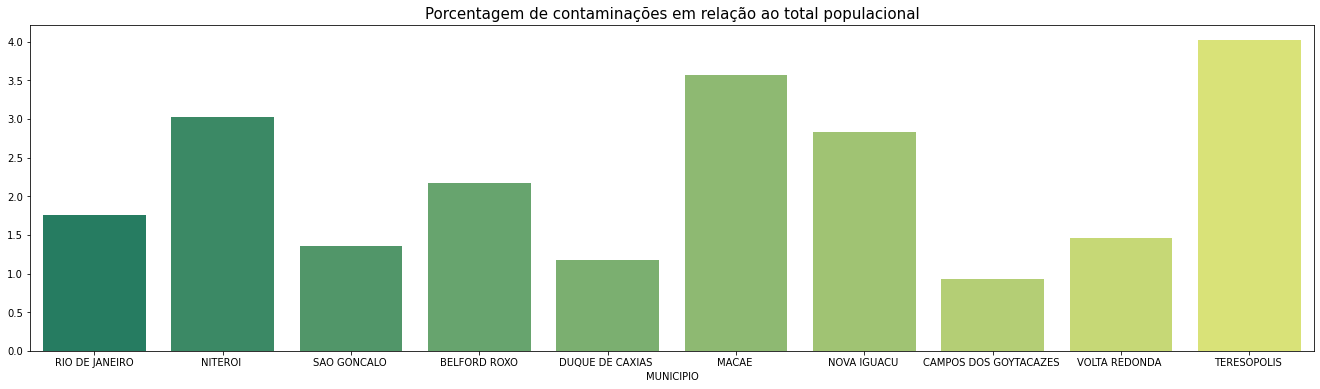

In [ ]:
graf=dados.head(10)
listapops = [6747815,515317,1091737,513118,924624,261501,273988,823302,511168,184240]
listacont = list(graf['TOTAL'])
listacont_pop = [100*(listacont[x]/listapops[x]) for x in range(0,len(listapops))]
#Escolhendo o tamanho do gráfico
fig, ax = plt.subplots(figsize=(23,6))
#Criando o gráfico de barras 
sns.barplot(x=graf['MUNICIPIO'][:10],y=listacont_pop,palette="summer",ax=ax,data=graf)
#Inserindo título
ax.set_title('Porcentagem de contaminações em relação ao total populacional', fontdict={'fontsize':15})

Portanto, como dito anteriormente, o gráfico acima demonstra que , por exemplo, apesar do Rio de janeiro possuir uma maior contaminação total é o estado de Teresopolis que possui uma porcentagem maior da sua população afetada. Ou seja, o gráfico de valores absolutos nos ajuda apenas a observar qual foi o municipio que afetou , em valores totais, o estado do Rio de Janeiro e o grafico seguinte,em relação a população por município, pode nos ajudar a recenhocer qual foi o municipio que teve o maior impacto em relação a sua população, que aqui no caso foi o município de Teresópolis.

##Comparação da evolução diária de casos em alguns munícipios

In [ ]:
covid=dadoscovid.copy()
covid=covid.groupby(by=['MUNICIPIO','DIAS']).count()
covid.reset_index(inplace=True)
covid=covid[['MUNICIPIO','DIAS','DATA SINTOMA']]
covid.columns=['MUNICIPIO','DIAS','NUMERO DE CASOS']
def grafico_cont_dia(mun):
  covid2=covid[covid['MUNICIPIO'].str.contains(mun)]
  plt.plot(covid2['DIAS'],covid2['NUMERO DE CASOS'],label=str(mun))
  plt.legend()


Buscando analisar se há alguma correlação entre a contaminação e a distância que um município possui um do outro criamos dois gráficos, um deles relacionando São Gonçalo e Niterói que possui 11.7km e o outro relacionando Angra dos reis e Itaperuna que possuem uma distância de 320 km.

###Primeiro vamos comparar as curvas de munícipios geograficamente próximos 

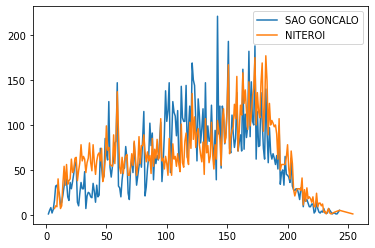

In [ ]:
grafico_cont_dia('SAO GONCALO')
grafico_cont_dia('NITEROI')

###Agora, compararemos municípios distantes

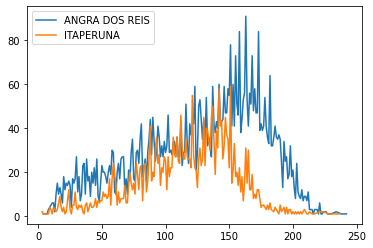

In [ ]:
grafico_cont_dia('ANGRA DOS REIS')
grafico_cont_dia('ITAPERUNA')

Assim, é possível concluir que o padrão das curvas de contaminação de munícipios próximos são mais parecidas.

##Dados municipais de óbitos por gênero.

In [ ]:
mun = geobr.read_municipality(code_muni="RJ")
df=pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Covid%20Trab.csv',delimiter=';') 
df_geobr= mun.merge(df, on = 'code_muni', how = 'right')
df_geobr=df_geobr.drop('Munícipio',axis=1)
df_geobr=df_geobr.drop('Unnamed: 7',axis=1)
df_geobr=df_geobr.drop('Unnamed: 8',axis=1)
df_geobr = gpd.GeoDataFrame(df_geobr, geometry="geometry")
df_geobr

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning:

Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.



,code_muni,name_muni,code_state,abbrev_state,geometry,Total de óbitos,Mulheres,Homens,Número de casos,Taxa de Letalidade
0,3304557.0,Rio De Janeiro,33,RJ,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12426...",11197,4958.0,6239.0,118433,9.45
1,3304904.0,São Gonçalo,33,RJ,"MULTIPOLYGON (((-43.10781 -22.84079, -43.10955...",727,305.0,422.0,14813,4.91
2,3301702.0,Duque De Caxias,33,RJ,"POLYGON ((-43.41519 -22.60109, -43.41627 -22.5...",725,340.0,385.0,10874,6.67
3,3303500.0,Nova Iguaçu,33,RJ,"POLYGON ((-43.56948 -22.60935, -43.57863 -22.6...",610,291.0,318.0,7758,7.86
4,3305109.0,São João De Meriti,33,RJ,"POLYGON ((-43.35351 -22.76080, -43.32929 -22.7...",454,201.0,253.0,3935,11.54
...,...,...,...,...,...,...,...,...,...,...
86,3306156.0,Varre-Sai,33,RJ,"POLYGON ((-41.82695 -20.84164, -41.82496 -20.8...",2,1.0,1.0,713,0.28
87,3301157.0,Cardoso Moreira,33,RJ,"POLYGON ((-41.51299 -21.41740, -41.44992 -21.3...",2,2.0,0.0,410,0.49
88,3302304.0,Laje Do Muriaé,33,RJ,"POLYGON ((-42.20310 -21.17461, -42.20036 -21.1...",1,1.0,0.0,350,0.29
89,3305307.0,São Sebastião Do Alto,33,RJ,"POLYGON ((-41.98741 -21.73588, -41.98520 -21.7...",1,0.0,1.0,88,1.14


In [ ]:
def Proc_Municipio(Município):
    x = df_geobr.set_index('name_muni')
    return x.loc[[Município]]
Proc_Municipio('Duque De Caxias')  

,code_muni,code_state,abbrev_state,geometry,Total de óbitos,Mulheres,Homens,Número de casos,Taxa de Letalidade
name_muni,,,,,,,,,
Duque De Caxias,3301702.0,33,RJ,"POLYGON ((-43.41519 -22.60109, -43.41627 -22.5...",725,340.0,385.0,10874,6.67


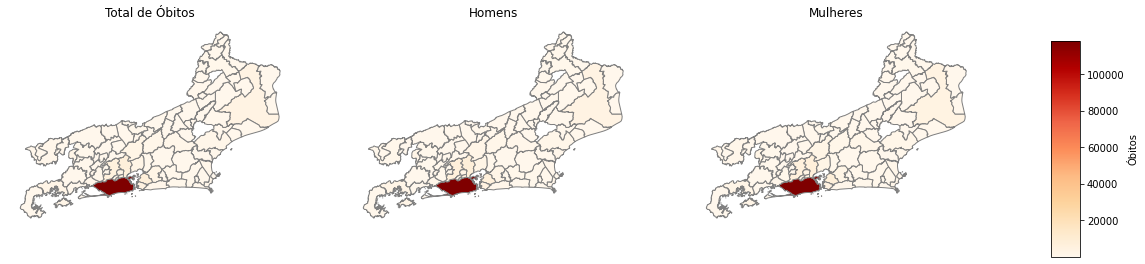

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (20,12))

for i in range(len(ax)):
  ax[i].axis('off')

cm = mpl.cm.OrRd

norm = mpl.colors.Normalize(vmin=88, vmax=118433)

cax = fig.add_axes([0.85, 0.35, 0.02, 0.25])

fig.subplots_adjust(right=0.8)

ax[0].set_title('Total de Óbitos')
ax[1].set_title('Homens')
ax[2].set_title('Mulheres')



df_geobr.plot(column = 'Total de óbitos', ax = ax[0], cmap = 'OrRd', edgecolor = 'grey')
df_geobr.plot(column = 'Mulheres', ax = ax[1], cmap = 'OrRd', edgecolor = 'grey')
df_geobr.plot(column = 'Homens', ax = ax[2], cmap = 'OrRd', edgecolor = 'grey')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), cax=cax, label='Óbitos')

#colocar uma barra de cor
#olhar vmax e vmin

plt.show()

##10 munícipios com mais óbitos

###Gráfico em termos absolutos 

Text(0.5, 1.0, '10 munícipios com maior número de óbitos em termos absolutos')

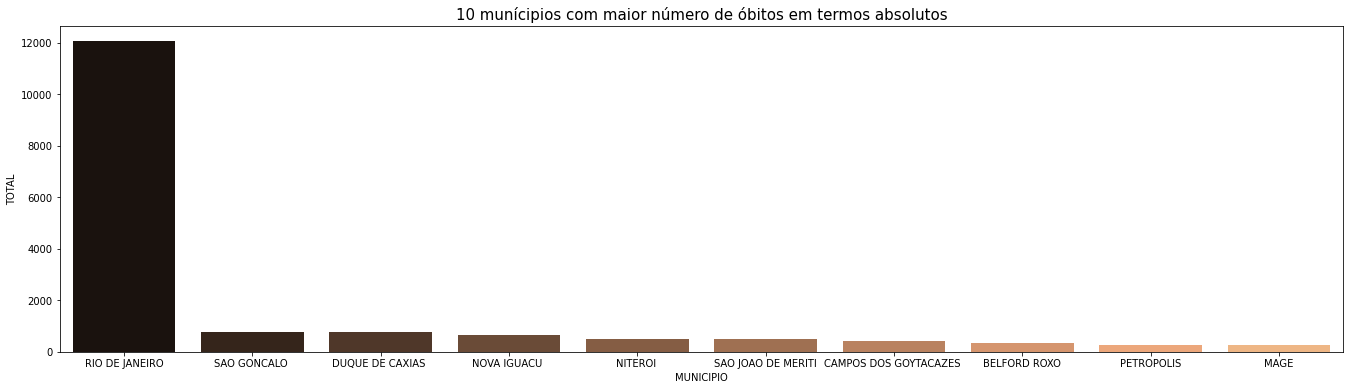

In [ ]:
graf_o=pd.DataFrame()
graf_o['TOTAL'] = dadosobitos['TOTAL']
graf_o['CONTAMINAÇÃO']=dados['TOTAL']
graf_o['MUNICIPIO']=graf_o.index.str.replace('  ','')
graf_o['TX_LETALIDADE']=graf_o['TOTAL']/graf_o['CONTAMINAÇÃO']
#Escolhendo o tamanho do gráfico
fig, ax = plt.subplots(figsize=(23,6))
#Criando o gráfico de barras 
sns.barplot(x=graf_o['MUNICIPIO'][:10],y=graf_o['TOTAL'][:10],palette="copper",ax=ax,data=graf_o)
#Inserindo título
ax.set_title('10 munícipios com maior número de óbitos em termos absolutos', fontdict={'fontsize':15})

###Gráfico em relação à população

Text(0.5, 1.0, 'Porcentagem de óbitos em relação ao total municipal de contaminados')

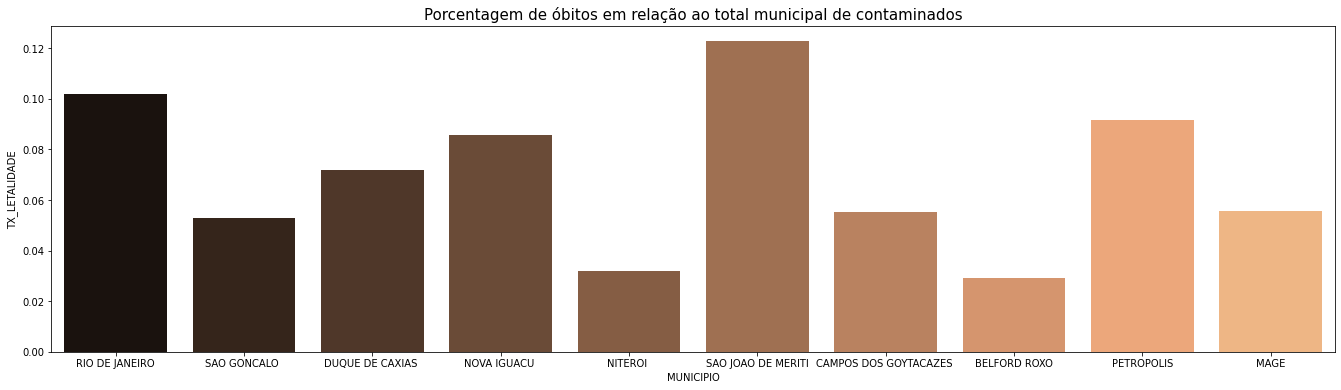

In [ ]:
#Escolhendo o tamanho do gráfico
fig, ax = plt.subplots(figsize=(23,6))
#Criando o gráfico de barras 
sns.barplot(x=graf_o['MUNICIPIO'][:10],y=graf_o['TX_LETALIDADE'][:10],palette="copper",ax=ax,data=graf_o)
#Inserindo título
ax.set_title('''Porcentagem de óbitos em relação ao total municipal de contaminados''', fontdict={'fontsize':15})

### A partir do gráfico acima é possível concluir que nem sempre aqueles municípios com maior número de contaminados, será também aquele onde ocorrerá o maior número de óbitos provocados pelo vírus. Isto ocorre pois, apesar de as taxas de contaminação e mortes possuírem uma correlação forte e positiva, outros fatores podem afetar esta relação. A principal consequência dos efeitos negativos destes fatores para uma população muitas vezes é uma maior taxa de letalidade


---


#Análises acerca da Taxa de Letalidade


###No gráfico á seguir é possivel atestar a correlação positiva entre o número de contaminações e o número de óbitos.
####Para a confecção dos gráficos foi necessária reduzir as amostras de forma a remover outliers e aprimorar a visualização, sendo assim, foram removidos os 10 e os 50 munícipios com maior incidência respectivamente.

<Figure size 1080x576 with 0 Axes>

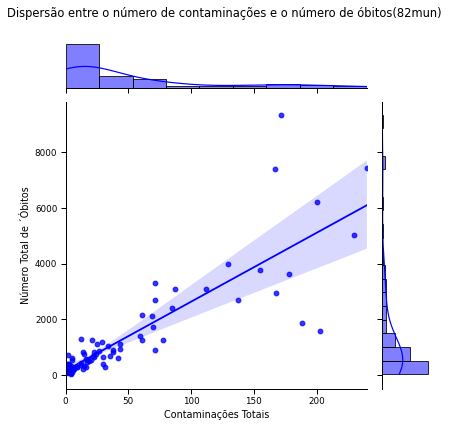

<Figure size 1080x576 with 0 Axes>

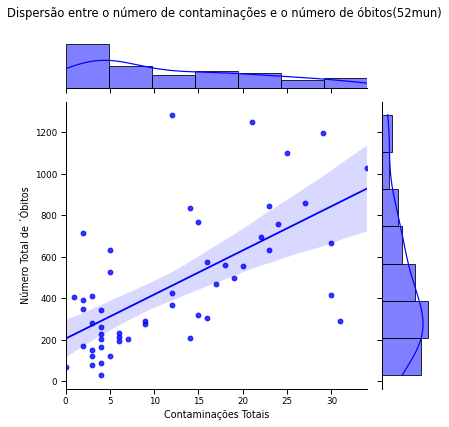

In [ ]:
graf_o=pd.DataFrame()
graf_o['TOTAL'] = dadosobitos['TOTAL']
graf_o['CONTAMINAÇÃO']=dados['TOTAL']
graf_o['MUNICIPIO']=graf_o.index.str.replace('  ','')
graf_o['TX_LETALIDADE']=graf_o['TOTAL']/graf_o['CONTAMINAÇÃO']
tx=graf_o.copy()
tx.iloc[:,:]=tx.iloc[10:,:]
plt.figure(figsize=(15,8))
sns.set_context('paper')
ax=sns.jointplot(x="TOTAL", y="CONTAMINAÇÃO", data=tx, color='blue',kind='reg')
ax.fig.suptitle('''Dispersão entre o número de contaminações e o número de óbitos(82mun)''')
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.90)
ax.set_axis_labels("Contaminações Totais","Número Total de ´Óbitos")
tx2=graf_o.copy()
tx2.iloc[:,:]=tx2.iloc[40:,:]
plt.figure(figsize=(15,8))
sns.set_context('paper')
ax=sns.jointplot(x="TOTAL", y="CONTAMINAÇÃO", data=tx2, color='blue',kind='reg')
ax.fig.suptitle('''Dispersão entre o número de contaminações e o número de óbitos(52mun)''')
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.90)
ax.set_axis_labels("Contaminações Totais","Número Total de ´Óbitos")

##Taxa de letalidade de todos os municípios

###Mapa

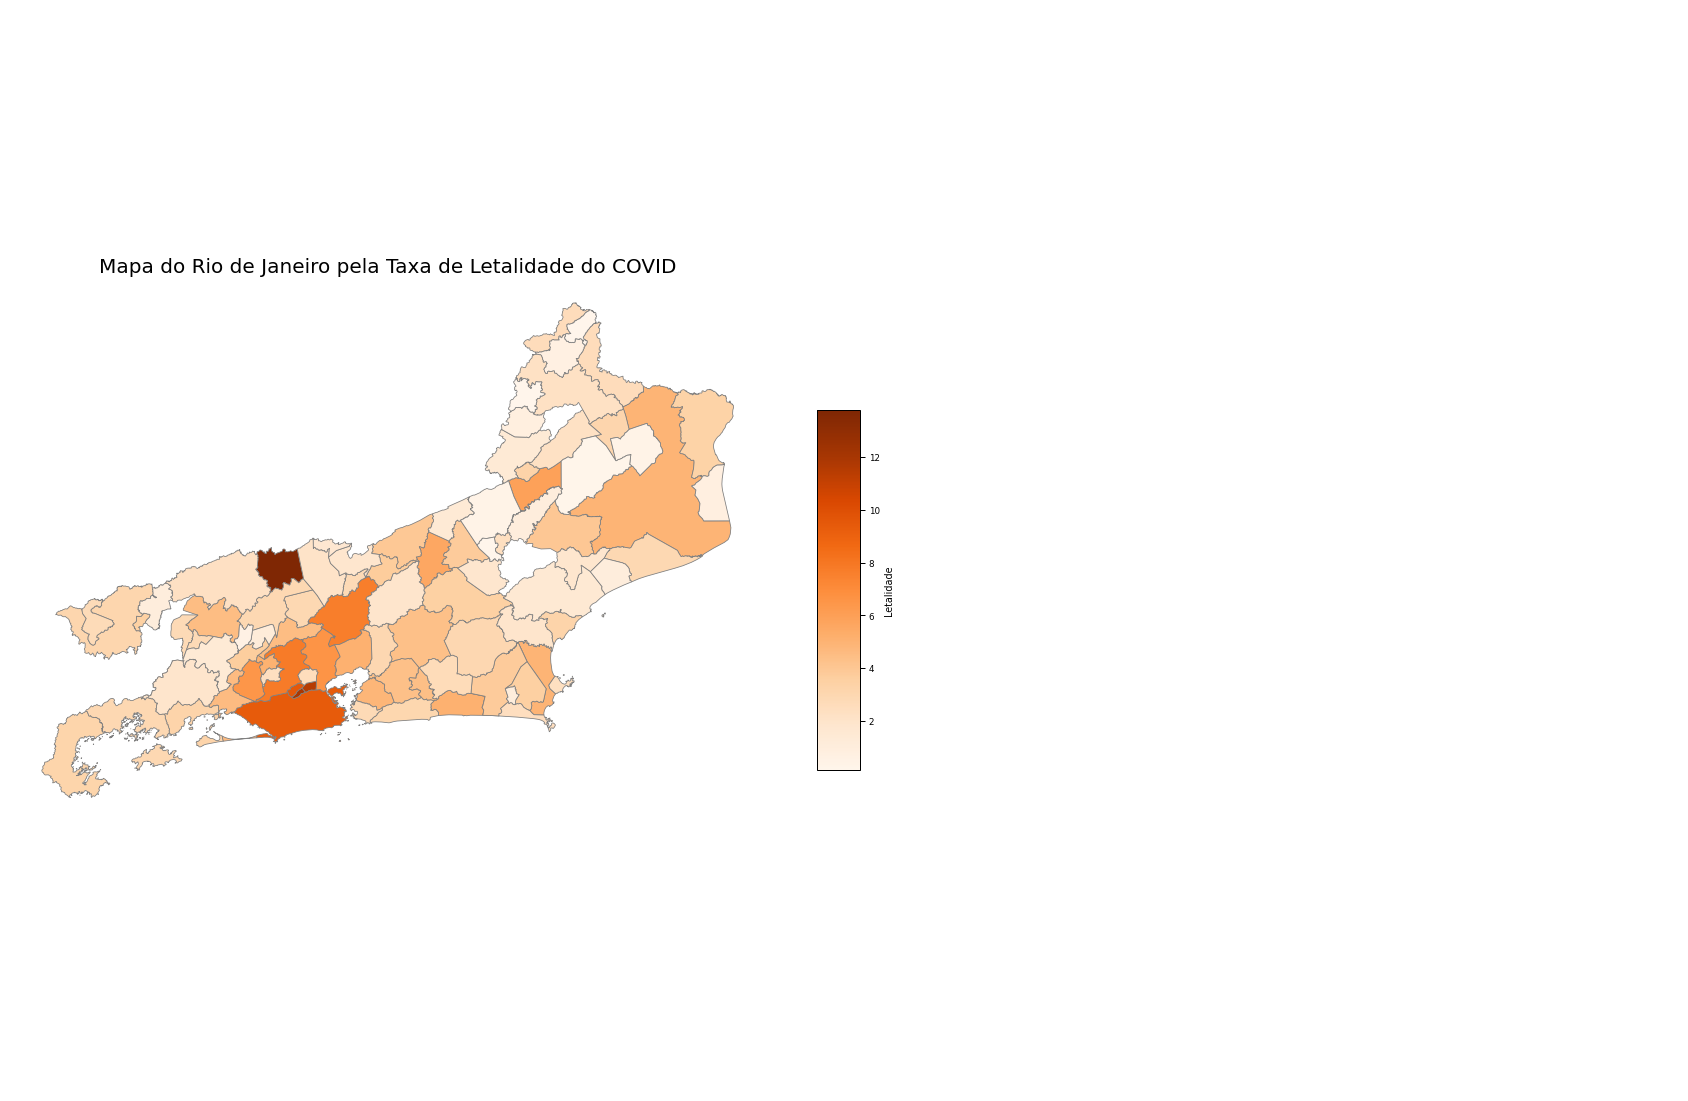

In [ ]:
df_geobr=df_geobr.sort_values(by='Taxa de Letalidade', ascending=False, na_position='first')

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (30,20))

cm = mpl.cm.Oranges

norm = mpl.colors.Normalize(vmin=0.15, vmax=13.79)

cax = fig.add_axes([0.50, 0.35, 0.02, 0.25])


for i in range(len(ax)):
  ax[i].axis('off')

ax[0].set_title('Mapa do Rio de Janeiro pela Taxa de Letalidade do COVID',size=20)

df_geobr.plot(column = 'Taxa de Letalidade',ax=ax[0],cmap = 'Oranges', edgecolor = 'grey')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), cax=cax, label='Letalidade')


plt.show()


###Tabela

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
TX=df_geobr.copy()
TX=df_geobr[['name_muni','Taxa de Letalidade']]
TX.columns=['Municipio','Taxa de Letalidade']
TX.set_index(keys='Municipio',inplace=True)
TX

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Taxa de Letalidade
Municipio,
Rio Das Flores,13.79
Nilópolis,11.98
São João De Meriti,11.54
Mesquita,9.56
Rio De Janeiro,9.45
Nova Iguaçu,7.86
Petrópolis,7.76
Duque De Caxias,6.67
Seropédica,6.55


##A relação entre o número de contaminados e o número de óbitos é clara, entretanto municípios como Rio das Flores, parecem não presenciar o mesmo fenômeno. Isto pode ser explicado por uma baixa testagem da população, o que reduz o número real de contaminados e provoca aumentos na taxa de letalidade. A cidade testou apenas 3,8% de sua população enquanto Cordeiro, município com menor taxa de letalidade dentre aquelas maiores de 0, realizou testes em 11,5% de todos os seus residentes 

##**Referências**


###  Gráficos de barra com matplotlib: https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351

### Galeria de gráficos: https://python-graph-gallery.com/

###População dos Munícipios : https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Rio_de_Janeiro_por_popula%C3%A7%C3%A3o

